## Exploratory Data Analysis

In this notebook, I am doing EDA to get a good snapshot of the dataset and where it is starting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
import re
import string

In [2]:
df = pd.read_csv("allsongscombined.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106140 entries, 0 to 106139
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             106140 non-null  object 
 1   artist            106140 non-null  object 
 2   tag               106140 non-null  object 
 3   year              106140 non-null  int64  
 4   lyrics            106140 non-null  object 
 5   album             106140 non-null  object 
 6   explicit          106140 non-null  bool   
 7   danceability      106140 non-null  float64
 8   energy            106140 non-null  float64
 9   key               106140 non-null  int64  
 10  loudness          106140 non-null  float64
 11  mode              106140 non-null  int64  
 12  speechiness       106140 non-null  float64
 13  acousticness      106140 non-null  float64
 14  instrumentalness  106140 non-null  float64
 15  liveness          106140 non-null  float64
 16  valence           10

In [4]:
df.head()

,title,artist,tag,year,lyrics,album,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,decade
0,Can I Live,jay-z,rap,1996,"\n\n\nYeah, hah, yeah, Roc-A-Fella\nWe invite ...",Reasonable Doubt,True,0.624,0.692,9,...,1,0.433,0.0818,0.000000,0.1610,0.576,76.440,248573,4.0,1990s
1,We Fly High,jim jones,rap,2006,\nI wear a mean dark pair of shades\nAnd you c...,Hustler's P.O.M.E. (Product Of My Environment),True,0.506,0.799,1,...,1,0.380,0.0791,0.000000,0.0929,0.461,120.405,236080,5.0,2000s
2,N.Y. State of Mind,nas,rap,1994,"\n\n\nYeah, yeah\nAyo, Black—it's time, word (...",Illmatic,True,0.665,0.910,6,...,0,0.223,0.0394,0.000000,0.2270,0.887,84.099,293973,4.0,1990s
3,The World Is Yours,nas,rap,1994,\n\n\n(It's yours)\nWhose world is this?\nThe ...,Illmatic,True,0.678,0.794,10,...,0,0.140,0.2740,0.000002,0.1240,0.540,87.374,290573,4.0,1990s
4,Keys Open Doors,clipse,rap,2006,"\nKeys open doors, keys open doors\nKeys open ...",Hell Hath No Fury,True,0.610,0.982,6,...,0,0.266,0.1960,0.024500,0.1540,0.711,84.737,199427,4.0,2000s


First let's see how all of the songs break down by decade and genre.

In [7]:
df_decades = df[['title', 'decade']]
decade_counts = df['decade'].value_counts()
counts_df = decade_counts.reset_index()
counts_df.columns = ['Decade', 'Count']

In [8]:
df_sorted = counts_df.sort_values(by='Decade')

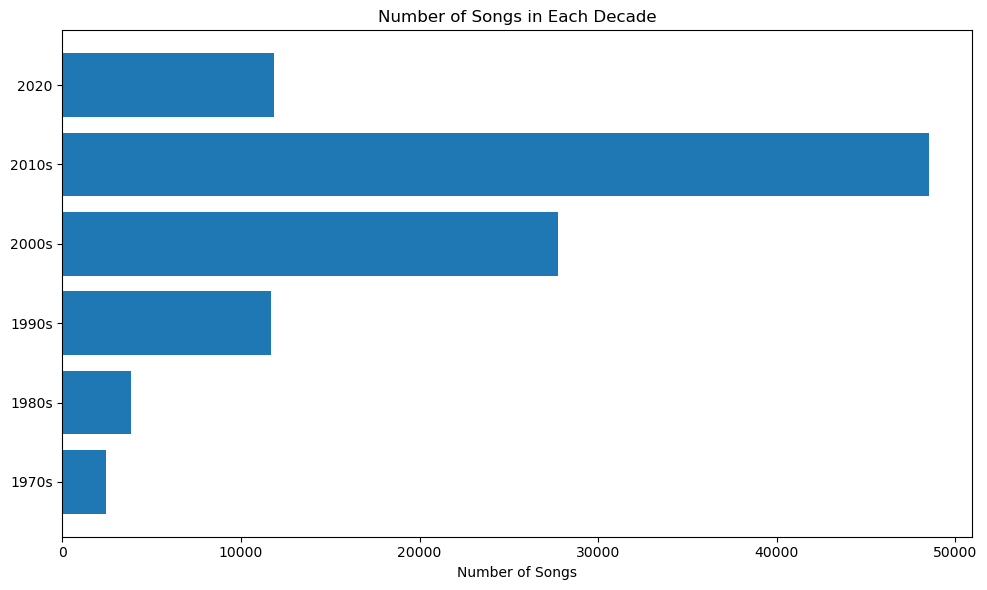

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(df_sorted["Decade"], df_sorted["Count"])
#line, = ax.plot(df_sorted["Decade"], df_sorted["Count"])
ax.set_xlabel('Number of Songs')
ax.set_yticks(df_sorted["Decade"])
ax.set_yticklabels(df_sorted["Decade"])
ax.set_title('Number of Songs in Each Decade')

plt.tight_layout()

There are more songs in the 2010s than any other decade, by about 20,000. The 2000s also have nearly 20,000 songs more than the next decades, the 1990s and 2020.

In [14]:
df_genre = df[['title', 'tag']]
genre_counts = df['tag'].value_counts()
genrecounts_df = genre_counts.reset_index()
genrecounts_df.columns = ['Genre', 'Count']

In [17]:
df_sorted_genre = genrecounts_df.sort_values(by='Genre')

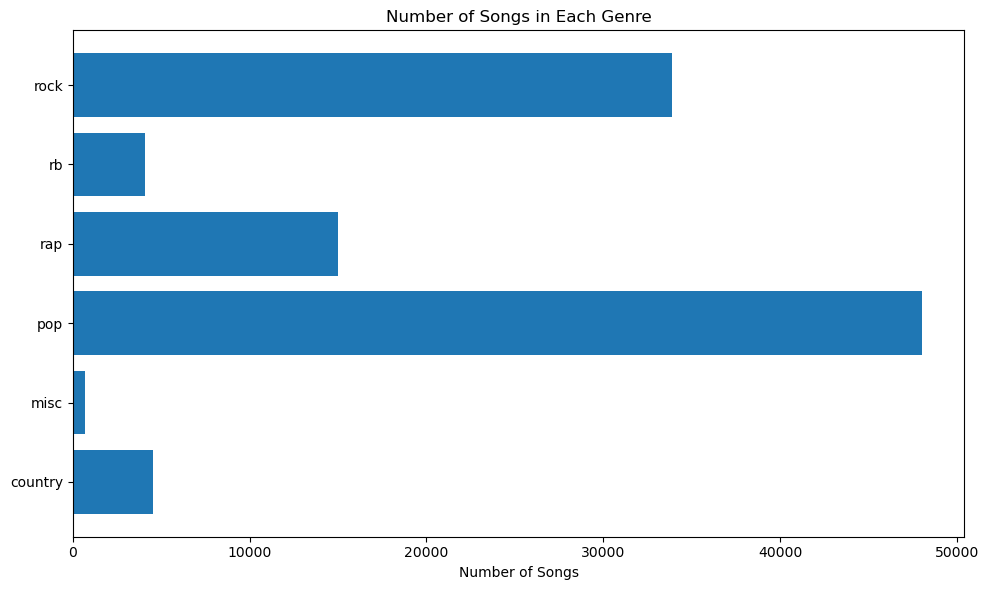

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(df_sorted_genre["Genre"], df_sorted_genre["Count"])
#line, = ax.plot(df_sorted["Decade"], df_sorted["Count"])
ax.set_xlabel('Number of Songs')
ax.set_yticks(df_sorted_genre["Genre"])
ax.set_yticklabels(df_sorted_genre["Genre"])
ax.set_title('Number of Songs in Each Genre')

plt.tight_layout()

Again, there are many more Pop songs than the other genres, though Rock is close behind. I may look at these genres separately to determine clustering if needed or I may look at just one decade at a time to see if there are different themes by decade as well as genre.

In [21]:
df_sorted

,Decade,Count
5,1970s,2461
4,1980s,3869
3,1990s,11702
1,2000s,27761
0,2010s,48509
2,2020,11838


In [23]:
df.groupby('tag')['decade'].count()

tag
country     4513
misc         683
pop        48027
rap        14972
rb          4065
rock       33880
Name: decade, dtype: int64

In [29]:
counts = df.groupby(['decade', 'tag']).size().reset_index(name = 'count')

In [30]:
counts

,decade,tag,count
0,1970s,country,220
1,1970s,misc,3
2,1970s,pop,1176
3,1970s,rap,2
4,1970s,rb,163
5,1970s,rock,897
6,1980s,country,244
7,1980s,misc,29
8,1980s,pop,2130
9,1980s,rap,48


In [31]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   decade  36 non-null     object
 1   tag     36 non-null     object
 2   count   36 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [34]:
counts['label'] = counts['decade'] + ' - ' + counts['tag']

In [35]:
counts.head()

,decade,tag,count,label
0,1970s,country,220,1970s - country
1,1970s,misc,3,1970s - misc
2,1970s,pop,1176,1970s - pop
3,1970s,rap,2,1970s - rap
4,1970s,rb,163,1970s - rb


In [82]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.lines import Line2D

In [58]:
color_map = {
    "rock": 'lightblue',
    "rb": 'orange',
    "rap": 'red',
    "pop": 'purple',
    "misc": 'gold',
    "country": 'cyan'
}

In [59]:
colors = counts['tag'].map(color_map)

To create vertical lines between the decades, I found [this tutorial](https://www.tutorialspoint.com/plot-a-vertical-line-in-matplotlib) very helpful.

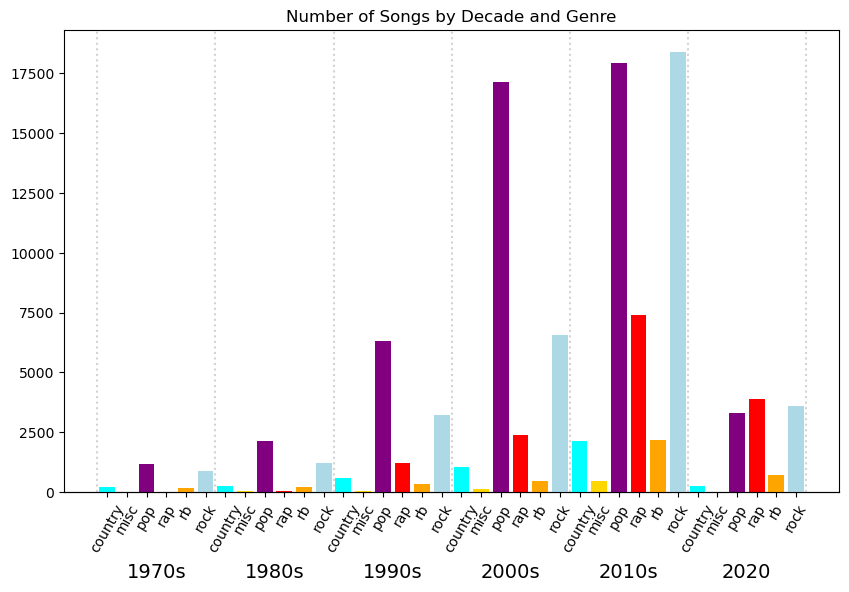

In [120]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(counts['label'], counts['count'], color=colors)
ax.set_title('Number of Songs by Decade and Genre')
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts['tag'], fontsize=10, rotation = 60)

sec = ax.secondary_xaxis(location=0)
sec.set_xticks([2.5, 8.5, 14.5, 20.5, 26.5, 32.5], labels=['\n\n\n1970s', '\n\n\n1980s', '\n\n\n1990s', 
                                 '\n\n\n2000s', '\n\n\n2010s', '\n\n\n2020'],
              fontsize = 14)
sec.tick_params('x', length=0)

lines = [-0.5, 5.5, 11.5, 17.5, 23.5, 29.5, 35.5]

for xpos in lines:
    line = Line2D([xpos, xpos], [0, 20000], color='lightgrey', linestyle=':')
    ax.add_line(line)

plt.show()

Based on this chart, I am planning to limit this project to just the pop songs, since they are present in all of the decades.